# TD  1 : Régression logistique

## Partie 1 : La fonction sigmoide

### Q1 : Ecrire et tracer la fonction sigmoide $\sigma(x)=e^{x}/(1+e^{x})$ entre -10 et 10

In [1]:
sigmoid <- function(x) {
  return (exp(x)/(1+exp(x)))
}

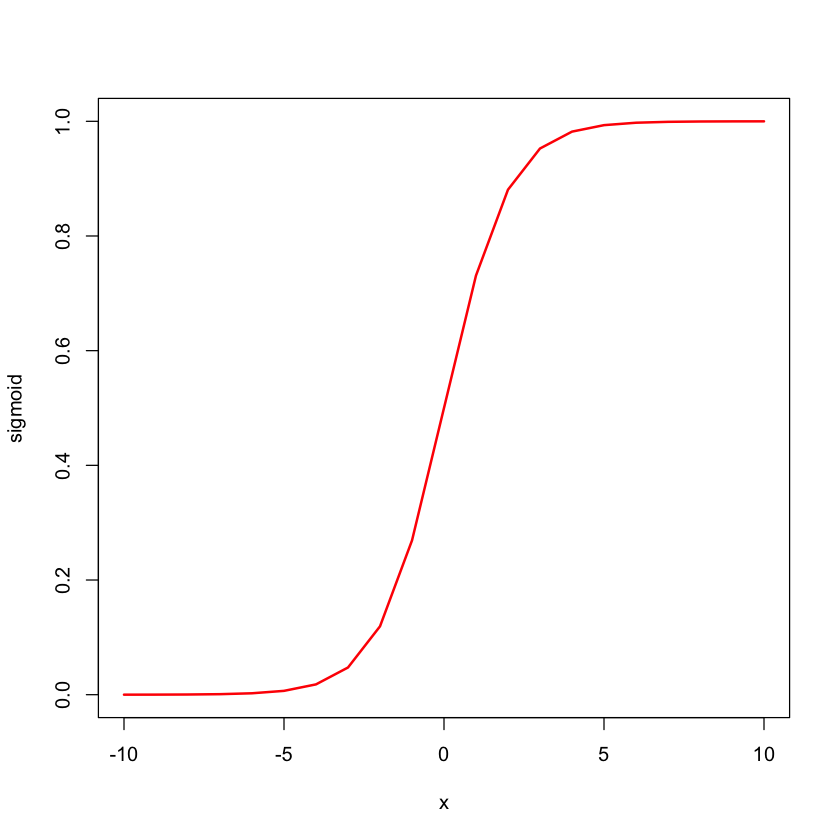

In [2]:
plot(c(-10:10),lapply(c(-10:10),sigmoid),type = "l",col='red',lwd=2,xlab = 'x',ylab='sigmoid')

### Données

On va travailler sur des données artificielles. 

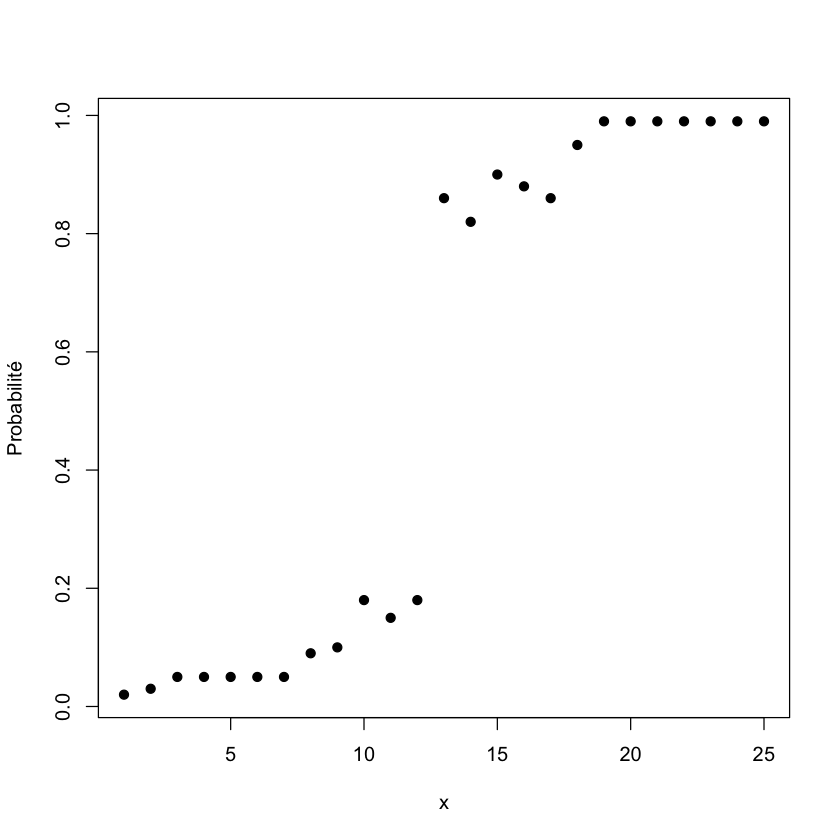

In [3]:
probas <- c(0.02, 0.03, 0.05, 0.05, 0.05, 0.05, 0.05, 0.09, 0.1, 0.18, 0.15, 0.18, 0.86, 0.82, 0.9, 0.88, 0.86, 0.95, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99)
x <- c(1:length(probas))
plot(x, probas, pch=19, cex=1, col='black', xlab = 'x', ylab = 'Probabilité')

Elles peuvent représenter la probabilité d'un évènement en fonction du nombre de tirages de cet évènement. (ex : gagner au loto , avoir un cancer en fonction du nombre de cigarettes...). 

L'objectif va être de modéliser ces probabilités en fonction du nombre de tirage. On va donc essayer de trouver une fonction $f$ telle que $\hat{p}(x)=f(x)$ approche au mieux les probabilités $p(x)$

### Q2 : Faire une regression linéaire pour approcher au mieux les probabilités. Illustrer et commenter.

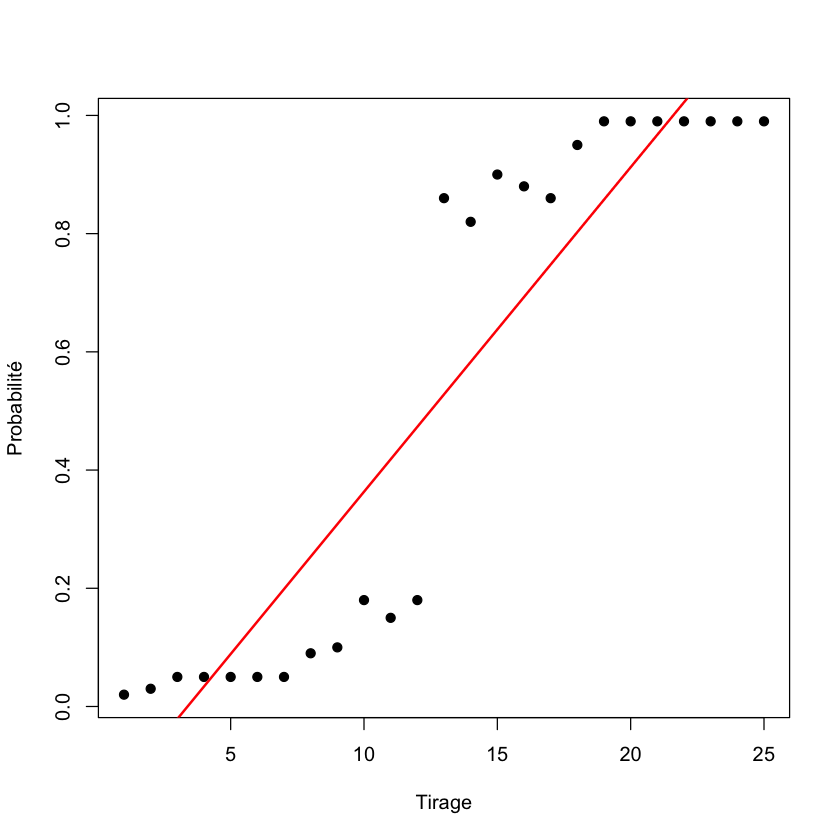

In [4]:
lin=lm(probas ~ x)
plot(x,probas,pch=19,cex=1,col='black',xlab = 'Tirage',ylab = 'Probabilité')
abline(lin,lwd=2,col='red')

In [5]:
summary(lin)


Call:
lm(formula = probas ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29309 -0.14855  0.01617  0.13255  0.33200 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.185800   0.073429   -2.53   0.0187 *  
x            0.054908   0.004939   11.12    1e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1781 on 23 degrees of freedom
Multiple R-squared:  0.8431,	Adjusted R-squared:  0.8363 
F-statistic: 123.6 on 1 and 23 DF,  p-value: 1.001e-10


Visuelement on remarque que la dépendance n'est pas linéaire. On peut voir que les points suivent une sigmoide. 
L'idée va être d'approcher au mieux les points par une sigmoide fonction de $\beta_{1}x+\beta_{0}$ en faisant varier $\beta_{1}$ et $\beta_{0}$

### Q3 : Essayer d'approcher les probabilités par $\sigma(\beta_{1}x+\beta_{0})$

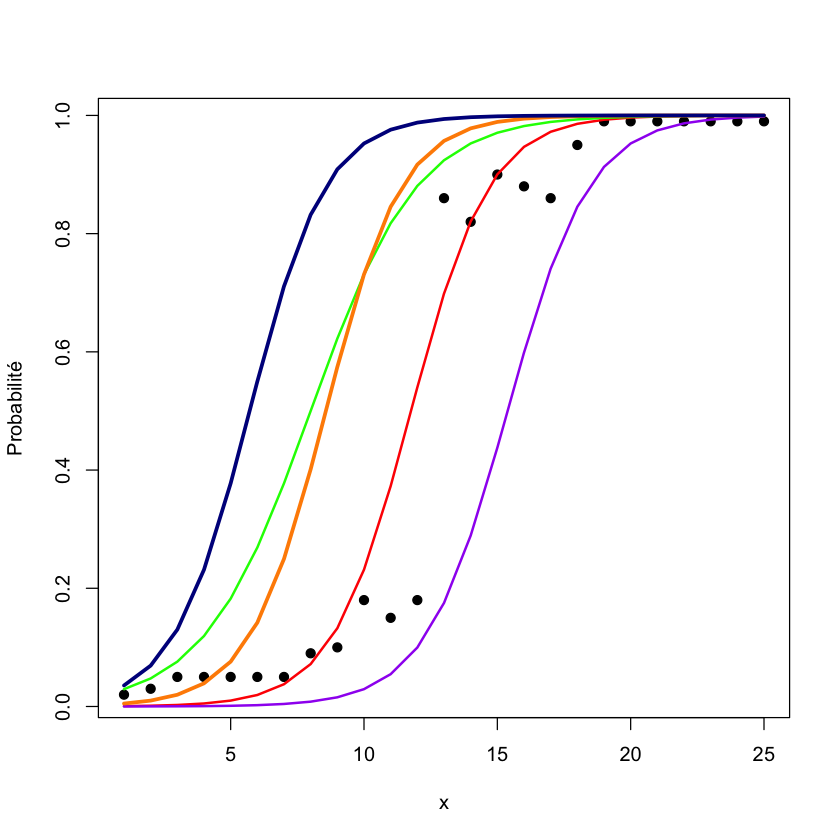

In [6]:
plot(x,probas,pch=19,cex=1,col='black',xlab = 'x',ylab = 'Probabilité')
lines(unlist(lapply(0.68*x-8, sigmoid)),col='red',lwd=2)
lines(unlist(lapply(0.5*x-4, sigmoid)),col='green',lwd=2)
lines(unlist(lapply(0.65*x-10, sigmoid)),col='purple',lwd=2)
lines(unlist(lapply(0.7*x-6, sigmoid)),col='darkorange',lwd=3)
lines(unlist(lapply(0.7*x-4, sigmoid)),col='darkblue',lwd=3)

### Q4 : Quel modèle avons-nous écrit ?

Si on note x les tirages et $p(x)$ la probabilité on a alors essayer de modéliser $p(x)$ par $\hat{p}(x)=\sigma(\beta_{1}x+\beta_{0})$

## Partie 2 : La regression logistique

La regression logistique utilise la fonction sigmoide. Au lieu de modéliser une probabilité brute $p(x)$, la regression logistique est utilisée en classification pour modéliser la probabilité d'appartenir à une classe. On note cette probabilité $p(C|x)$.

Le modèle de regression logistique va modéliser $p(C|x)$ comme $\hat{p}(C|x)=\sigma(\beta_{0}+\beta_{1}x_{1}+...+\beta_{p}x_{p})$ et va déterminer $\beta_{0}$, $\beta_{1}$,...,$\beta_{p}$ qui vont le plus "coller" aux données.

### Q4 : Question sur l'équivalence des modèles.

Montrez que les formulations $\pi(x)=\frac{exp(\beta_{0}+\beta_{1}x_{1}+...+\beta_{p}x_{p})}{1+exp(\beta_{0}+\beta_{1}x_{1}+...+\beta_{p}x_{p})}$ et $\text{logit}(x)=\log(\frac{\pi(x)}{1-\pi(x)})=\beta_{0}+\beta_{1}x_{1}+...+\beta_{p}x_{p}$ sont équivalentes.

## Cas parfaitement séparable

On rajoute au cas précédent des classes (ex : on a effectivement gagné au lotto ou eu un cancer).

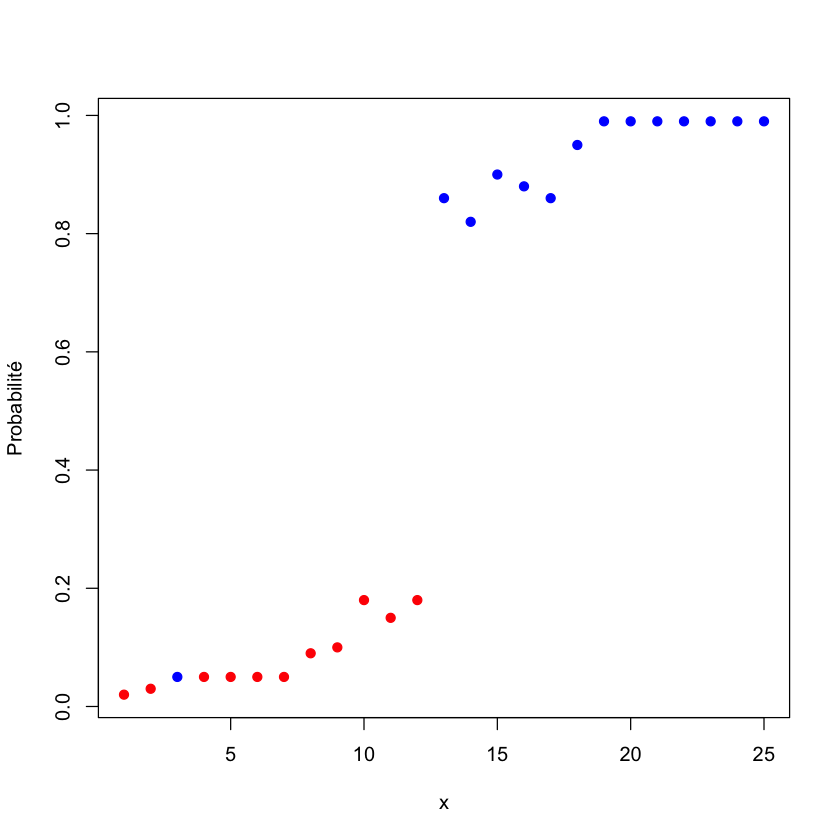

In [7]:
clr1 <- c(rgb(1,0,0,1),rgb(0,0,1,1))
probas <- c(0.02, 0.03, 0.05, 0.05, 0.05, 0.05, 0.05, 0.09, 0.1, 0.18, 0.15, 0.18, 0.86, 0.82, 0.9, 0.88, 0.86, 0.95, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99)
y <- c(0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1)
x <- c(1:length(probas))
plot(x, probas, pch=19, cex=1, col=clr1[y+1], xlab = 'x', ylab = 'Probabilité')

### Q4 : Pourquoi est-ce parfaitement séparable ?

Car on peut dire qu'au dessus de 0.3 on est dans la classe 1 sinon on est dans la classe 0

### Q5: Effectuer la regression logistique. Donnez les paramètres $\beta_{1}$ et $\beta_{0}$. Sont-ils valables ?

In [24]:
reg=glm(y~x,family=binomial)
summary(reg)
reg$coefficients[1]
reg$coefficients[2]


Call:
glm(formula = y ~ x, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1290  -0.6155   0.2334   0.6109   2.3569  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -3.5728     1.4437  -2.475  0.01333 * 
x             0.2865     0.1061   2.700  0.00694 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 34.617  on 24  degrees of freedom
Residual deviance: 20.811  on 23  degrees of freedom
AIC: 24.811

Number of Fisher Scoring iterations: 5


(Intercept) 
  -3.572792

x 
0.2864801

p value de 1 : on peut raisonnablement rejetter l'hypothèse nulle

### Q6 : Plotez la sigmoide associée à notre problème. Satisfaisant ?

In [15]:
sigmoid(predict(reg))

1             2             3             4             5 
2.463227e-201 6.849642e-184 1.904720e-166 5.296569e-149 1.472848e-131 
            6             7             8             9            10 
4.095636e-114  1.138898e-96  3.167001e-79  8.806666e-62  2.448922e-44 
           11            12            13            14            15 
 6.809861e-27  1.893658e-09  1.000000e+00  1.000000e+00  1.000000e+00 
           16            17            18            19            20 
 1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 
           21            22            23            24            25 
 1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00

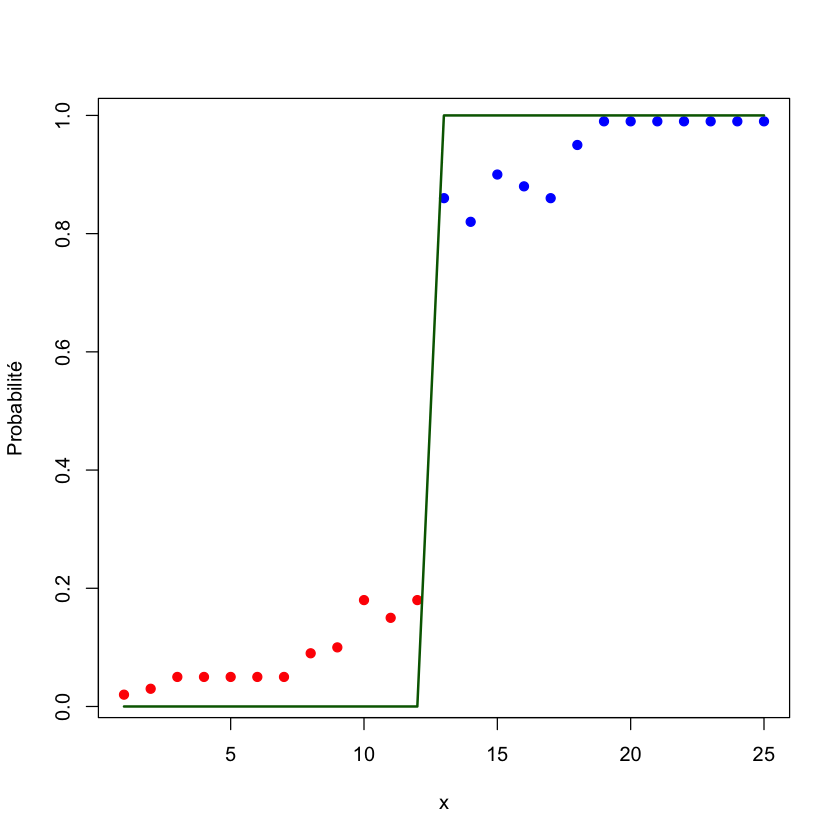

In [16]:
plot(x,probas,pch=19,cex=1,col=clr1[y+1],xlab = 'x',ylab = 'Probabilité')
lines(sigmoid(predict(reg)),col='darkgreen',lwd=2)

C'est le problème du cas où on est parfaitement séparable : la regression logistique ne converge pas.

## Cas non parfaitement séparable


### Q7 : Changez le problème en un problème non linéairement séparable

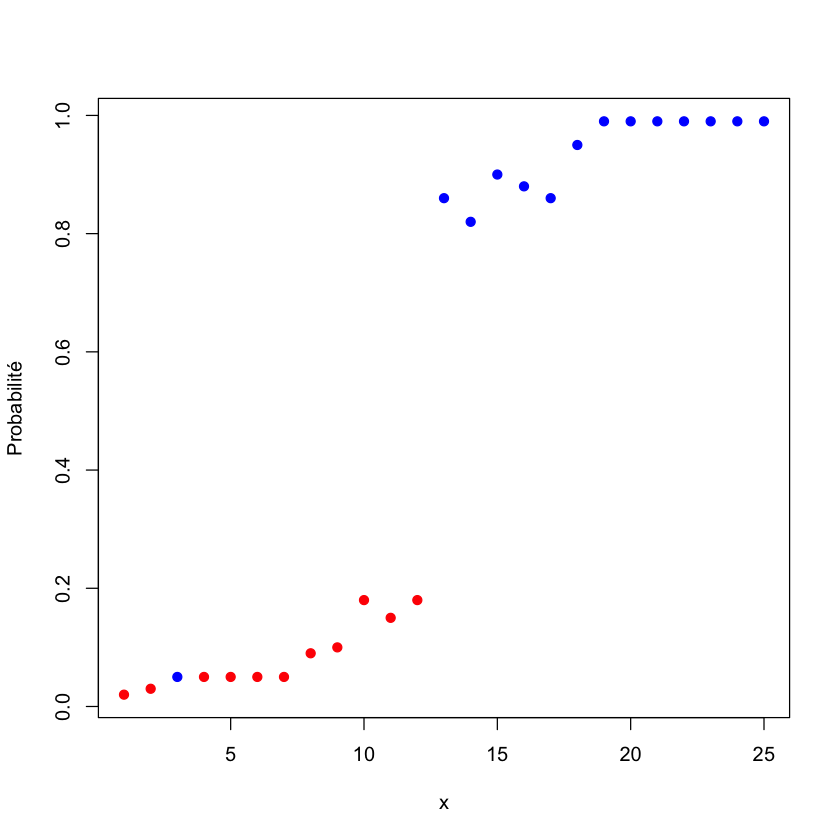

In [19]:
clr1 <- c(rgb(1,0,0,1),rgb(0,0,1,1))
#y <- c(0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.95,0.86,0.88,0.9,0.82,0.86,0.18,0.15,0.18,0.10,0.09,0.05,0.05,0.05,0.05,0.05,0.03,0.02)
y <- c(0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1)
x=c(1:length(y))
#probas=rev(y)
plot(x,probas,pch=19,cex=1,col=clr1[y+1],xlab = 'x',ylab = 'Probabilité')

### Q8 : Refaire la même démarche. Commentez.

In [20]:
reg=glm(y~x,family=binomial)
summary(reg)


Call:
glm(formula = y ~ x, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2706  -0.4382   0.1028   0.3558   2.6755  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -4.8067     1.9731  -2.436  0.01485 * 
x             0.4186     0.1610   2.600  0.00931 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 34.296  on 24  degrees of freedom
Residual deviance: 15.298  on 23  degrees of freedom
AIC: 19.298

Number of Fisher Scoring iterations: 6


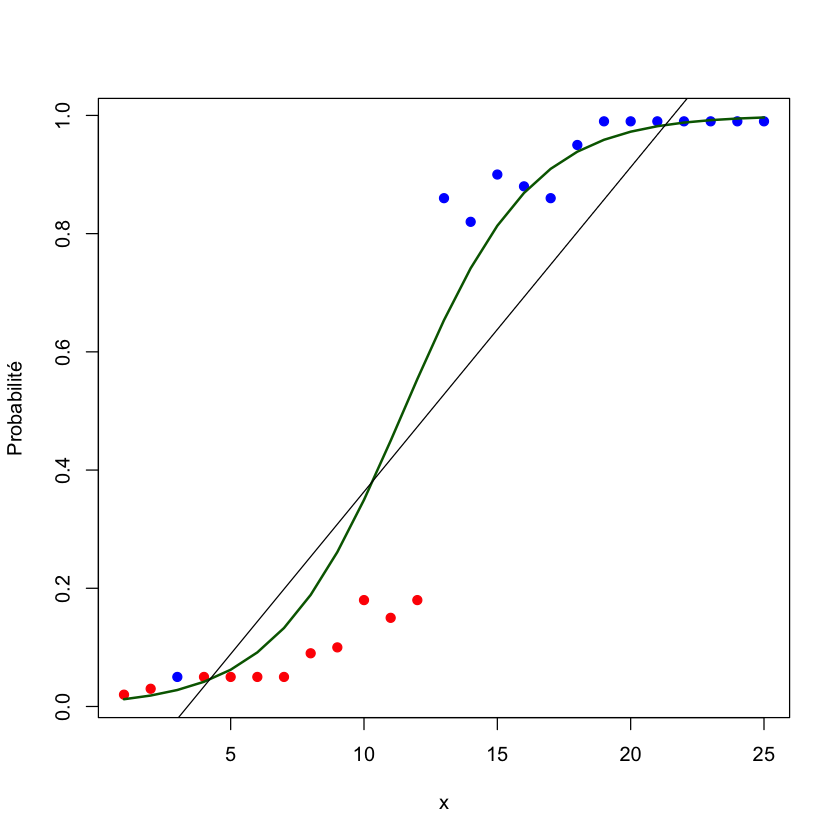

In [21]:
plot(x,probas,pch=19,cex=1,col=clr1[y+1],xlab = 'x',ylab = 'Probabilité')
lines(unlist(lapply(reg$coefficients[2]*x+reg$coefficients[1], sigmoid)),col='darkgreen',lwd=2)
abline(lin)